# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]

total_driver_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fare_amount = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fare_amount.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]

avg_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare_amount / total_driver_count

avg_fare_per_driver.head()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
          "Total Ride Count" : total_ride_count,
          "Total Driver Count": total_driver_count,
          "Total Fare Amount": total_fare_amount,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver})

pyber_summary_df


,Total Ride Count,Total Driver Count,Total Fare Amount,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("{:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("{:.2f}".format)

pyber_summary_df

,Total Ride Count,Total Driver Count,Total Fare Amount,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.62,8.06
Suburban,625,8570,19356.33,30.97,2.26
Urban,1625,59602,39854.38,24.53,0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_of_fares_type_date = pyber_data_df.groupby(["type", "date"]).sum()

sum_of_fares_type_date.head()

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_of_fares_type_date = sum_of_fares_type_date.reset_index()

sum_of_fares_type_date.head()

,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_of_fares_type_date_pivot = sum_of_fares_type_date.pivot(index = "date", columns = "type", values = "fare")
sum_of_fares_type_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

sum_of_fares_type_date_pivot = sum_of_fares_type_date_pivot.loc['2019-01-01':'2019-04-29']

In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

sum_of_fares_type_date_pivot.index = pd.to_datetime(sum_of_fares_type_date_pivot.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()

sum_of_fares_type_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

sum_of_fares_type_date_weekly = sum_of_fares_type_date_pivot.resample('W').sum()

sum_of_fares_type_date_weekly.head()


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


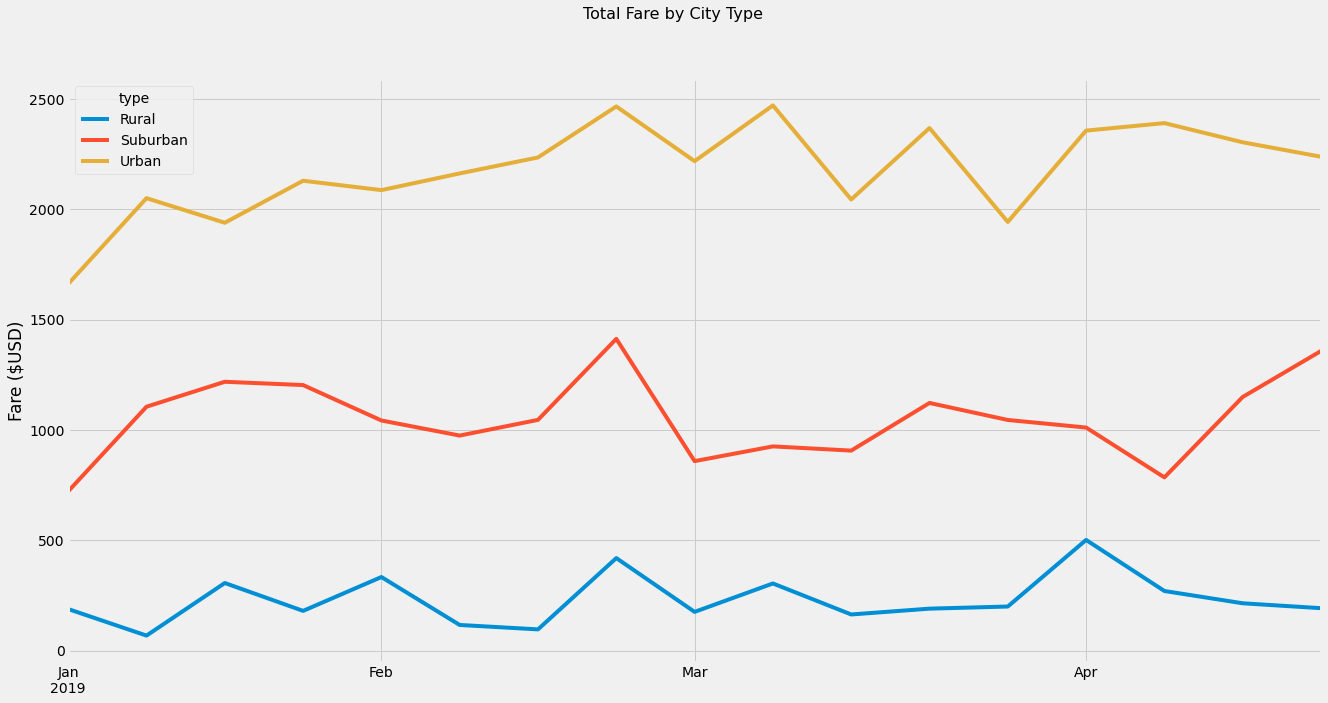

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, axs = plt.subplots()
fig.set_size_inches(20, 10)
axs.set_ylabel("Fare ($USD)")
fig.suptitle('Total Fare by City Type', fontsize=16)

sum_of_fares_type_date_weekly.plot(ax=axs, xlabel = "")

plt.savefig('analysis/PyBer_fare_summary.png')